<a href="https://colab.research.google.com/github/Vsanku01/Deep-Learning-Tuts/blob/master/DVC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 45.5MB/s]
 98% 265M/271M [00:04<00:00, 78.2MB/s]
100% 271M/271M [00:04<00:00, 68.0MB/s]
 98% 530M/544M [00:10<00:00, 47.8MB/s]
100% 544M/544M [00:10<00:00, 55.0MB/s]


In [3]:
from zipfile import ZipFile
file_name = "train.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
from zipfile import ZipFile
file_name = "test.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
TRAIN_DIR = '/content/train'
TEST_DIR = '/content/test'

In [0]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm as tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [38]:
for img in os.listdir(TRAIN_DIR):
  sample_image = img
  print(sample_image)
  break

cat.3682.jpg


In [39]:
url = '/content/train/'+sample_image
print(url)

/content/train/cat.3682.jpg


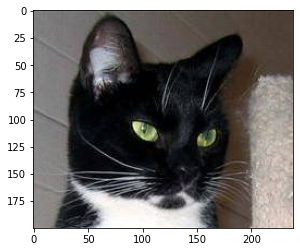

In [31]:
plt.imshow(plt.imread(url))

In [16]:
sample_image.split('.')[-3]

'cat'

In [0]:
filenames = os.listdir("/content/train")
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == "dog":
    categories.append(1)
  else:
    categories.append(0)

df = pd.DataFrame({
    'filename' : filenames,
    'category':categories
})

In [0]:
filenames = os.listdir(TRAIN_DIR)
categories = []
for filename in filenames:
  category = filename.split('.')[-3]
  if category == "dog":
    categories.append(1)
  else:
    categories.append(0)
df = pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [29]:
df.head()


,filename,category
0,cat.3682.jpg,0
1,cat.9398.jpg,0
2,dog.12110.jpg,1
3,dog.5665.jpg,1
4,cat.12348.jpg,0


In [0]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})

In [33]:
df.head()

,filename,category
0,cat.3682.jpg,cat
1,cat.9398.jpg,cat
2,dog.12110.jpg,dog
3,dog.5665.jpg,dog
4,cat.12348.jpg,cat


In [44]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)       

In [0]:
train_df,validate_df = train_test_split(df,test_size = 0.20,random_state=42)
train_df = train_df.reset_index(drop=True) # rest the index
validate_df = validate_df.reset_index(drop=True)

In [49]:
train_df.shape

(20000, 2)

In [51]:
validate_df.shape

(5000, 2)

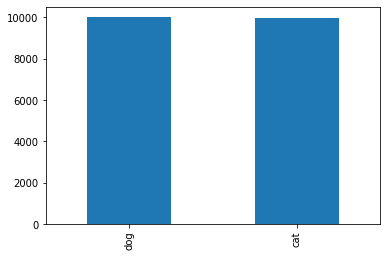

In [52]:
train_df['category'].value_counts().plot.bar()

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15
image_size = (128,128)

In [55]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/train/", 
    x_col='filename',
    y_col='category',
    target_size=image_size,
    class_mode='categorical',
    batch_size=15

)

Found 20000 validated image filenames belonging to 2 classes.


In [56]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/train/", 
    x_col='filename',
    y_col='category',
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [60]:
history = model.fit(
    train_generator, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,

)

Epoch 1/20
1333/1333 [==============================] - 167s 125ms/step - loss: 0.4686 - accuracy: 0.7826 - val_loss: 0.4940 - val_accuracy: 0.7660
Epoch 2/20
1333/1333 [==============================] - 168s 126ms/step - loss: 0.4366 - accuracy: 0.8019 - val_loss: 0.3832 - val_accuracy: 0.8346
Epoch 3/20
1333/1333 [==============================] - 173s 130ms/step - loss: 0.4232 - accuracy: 0.8077 - val_loss: 0.4488 - val_accuracy: 0.7920
Epoch 4/20
1333/1333 [==============================] - 173s 130ms/step - loss: 0.3994 - accuracy: 0.8228 - val_loss: 0.3639 - val_accuracy: 0.8430
Epoch 5/20
1333/1333 [==============================] - 168s 126ms/step - loss: 0.3930 - accuracy: 0.8264 - val_loss: 0.6445 - val_accuracy: 0.7632
Epoch 6/20
1333/1333 [==============================] - 167s 126ms/step - loss: 0.3813 - accuracy: 0.8311 - val_loss: 0.4337 - val_accuracy: 0.7830
Epoch 7/20
1333/1333 [==============================] - 165s 124ms/step - loss: 0.3637 - accuracy: 0.8422 - val_

In [0]:
result = pd.DataFrame(model.history.history)

In [62]:
result

,loss,accuracy,val_loss,val_accuracy
0,0.468550,0.782596,0.494029,0.765966
1,0.436591,0.801851,0.383209,0.834635
2,0.423233,0.807706,0.448786,0.791992
3,0.399444,0.822817,0.363887,0.843043
4,0.392988,0.826420,0.644499,0.763163
5,0.381295,0.831123,0.433683,0.782983
6,0.363674,0.842182,0.354604,0.868068
7,0.357938,0.845284,0.282619,0.881481
8,0.349121,0.848536,0.364854,0.838639
9,0.343836,0.849337,0.365287,0.846046


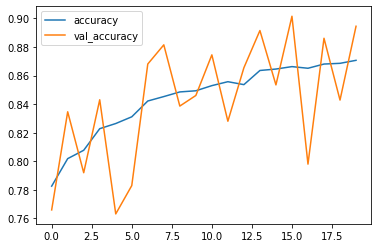

In [63]:
result[['accuracy','val_accuracy']].plot()

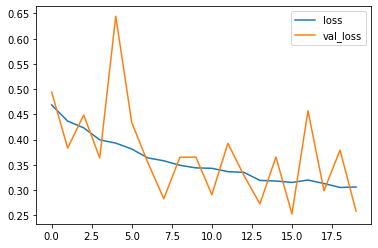

In [64]:
result[['loss','val_loss']].plot()